# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # For comparison

In [2]:
df = pd.read_csv("./datasets/student_performance.csv", usecols=["study_hours_per_day", "exam_score"], nrows = 200)
df.rename({"study_hours_per_day": "study_hours"}, axis=1, inplace=True)
df.head()

,study_hours,exam_score
0,0.0,56.2
1,6.9,100.0
2,1.4,34.3
3,1.0,26.8
4,5.0,66.4


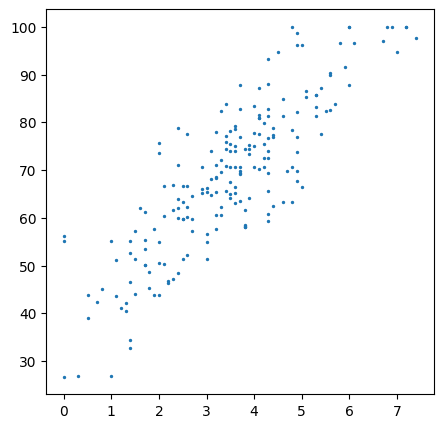

In [3]:
study_hours, exam_score = df['study_hours'].to_numpy(), df['exam_score'].to_numpy()

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(study_hours, exam_score, s=2)

In [ ]:
# Following algorithm finds partial derivatives of mean squared term and add it to the current value of m, n returns it.
# Learning rate should be between [0, 1) else it will diverge.
def gradient_descent(m_now, c_now, df, L):
  m_grad, c_grad = 0, 0
  n = df.shape[0]

  for i in range(n):
    x = df.iloc[i].study_hours
    y = df.iloc[i].exam_score
    m_grad += (-2 / n) * (y - (m_now * x + c_now)) * x
    c_grad += (-2 / n) * (y - (m_now * x + c_now))
  
  m_new = m_now - L * m_grad
  c_new = c_now - L * c_grad

  return m_new, c_new

m = 0
c = 0
n = df.shape[0]
epochs = 250 # NOTE : set it to 400, it will equal to sklearn

# This loop improves the m, c taking current value of m, c as basis.
for i in range(epochs):
  m, c = gradient_descent(m, c, df, 0.05)

print(m, c)

9.116135164219518 37.03696020896327


9.116135164219518 37.03696020896327


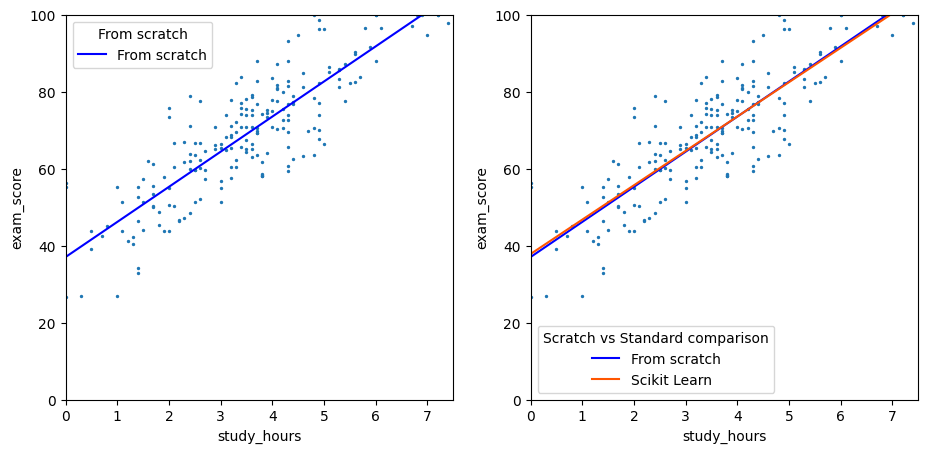

In [6]:
# Implementing scikit learn LinearRegression algorithm
model = LinearRegression(fit_intercept = True)  # Model instantiation
model.fit(study_hours.reshape(n, 1), exam_score) # training
m_sk = model.coef_[0]
c_sk = model.intercept_

x_vals = np.linspace(0, 7.5, 50)
y_vals_my = m * x_vals + c
y_vals_sk = m_sk * x_vals + c_sk

print(m, c)
fig2, ax = plt.subplots(1, 2, figsize=(11, 5))
ax[0].scatter(study_hours, exam_score, s=2)
ax[0].plot(x_vals, y_vals_my, label="From scratch", color="#00F")
ax[0].set_xlabel("study_hours")
ax[0].set_ylabel("exam_score")
ax[0].set_xlim(0, 7.5)
ax[0].set_ylim(0, 100)
ax[0].legend(title="From scratch")

ax[1].scatter(study_hours, exam_score, s=2)
ax[1].plot(x_vals, y_vals_my, label="From scratch", color="#00F")
ax[1].plot(x_vals, y_vals_sk, label="Scikit Learn", color="#F50")
ax[1].set_xlabel("study_hours")
ax[1].set_ylabel("exam_score")
ax[1].set_xlim(0, 7.5)
ax[1].set_ylim(0, 100)
ax[1].legend(title="Scratch vs Standard comparison")